In [1]:
!pip install pandas
!pip install numpy


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# 1. Importing Dataset and Overview

We have to make relevant changes in our test data set too hence we have to import both and simulatenously change both accordingly

In [3]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

## 1.1 Overview of the data


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(df_train.shape)


(1460, 81)


Structure of the data. Columns and their data types

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Understanding the response data 

Summary statistics of response data

In [8]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Visualizing the response data

<Axes: xlabel='Sale Price', ylabel='Frequency'>

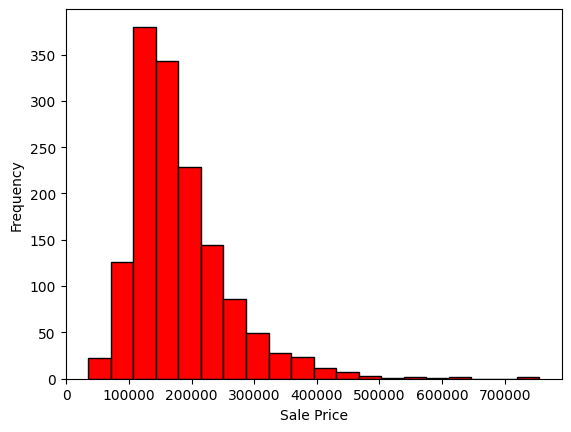

In [9]:
import matplotlib.pyplot as plt
df_train["SalePrice"].plot(kind = "hist", bins = 20, xlabel = "Sale Price", color = "red", edgecolor = 'black')

Performing log transformation to response data , so that skewness doesnt affect our results.

Skewness of SalePrice: 1.88
Log transformation applied to SalePrice.


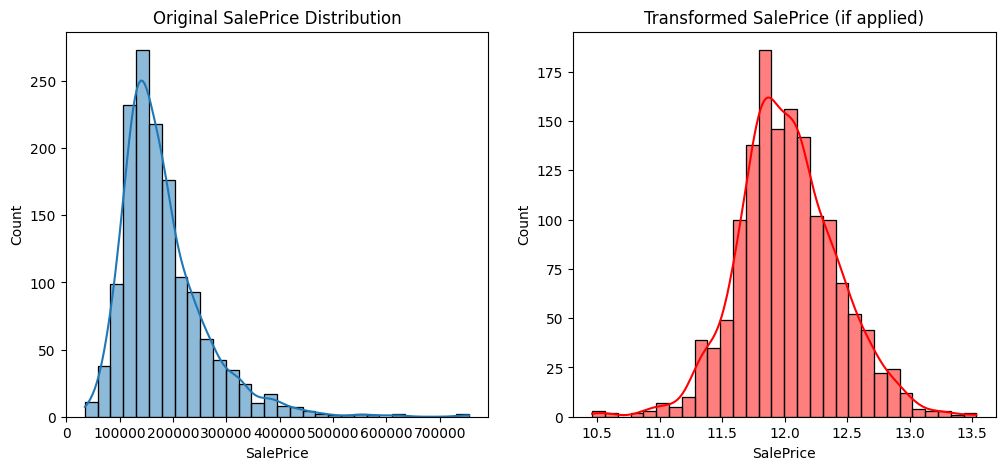

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the skewness of SalePrice
saleprice_skewness = df_train['SalePrice'].skew()
print(f"Skewness of SalePrice: {saleprice_skewness:.2f}")

# Plot original SalePrice distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_train['SalePrice'], bins=30, kde= True)
plt.title("Original SalePrice Distribution")

# Apply log transformation only if the skewness is high (> 1)
if saleprice_skewness > 1:
    df_train['SalePrice'] = np.log1p(df_train['SalePrice'])  # log1p(x) = log(x + 1)
    print("Log transformation applied to SalePrice.")
else:
    print("No transformation applied. SalePrice is not highly skewed.")

# Plot transformed SalePrice distribution
plt.subplot(1, 2, 2)
sns.histplot(df_train['SalePrice'], bins=30, kde=True , color = 'red')
plt.title("Transformed SalePrice (if applied)")

plt.show()

## 1.2 Missing Values

Finding columns with missing values and their data type

In [11]:
missing_percentage = df_train.isnull().mean() * 100 #finds percentage missing in a single column and stores as series 

missing_percentage = missing_percentage.sort_values(ascending = False ) #sorts missing percentage in descending order

column_data_types = df_train.dtypes[missing_percentage.index] #gathers the data types of columns with missing values

# Combine missing percentage and data types into a DataFrame for display
missing_percentage_with_types = pd.DataFrame({
    'Missing Percentage': missing_percentage,
    'Data Type': column_data_types
})

print(missing_percentage_with_types[missing_percentage > 0]) #display columns with missing data

              Missing Percentage Data Type
PoolQC                 99.520548    object
MiscFeature            96.301370    object
Alley                  93.767123    object
Fence                  80.753425    object
MasVnrType             59.726027    object
FireplaceQu            47.260274    object
LotFrontage            17.739726   float64
GarageQual              5.547945    object
GarageFinish            5.547945    object
GarageYrBlt             5.547945   float64
GarageType              5.547945    object
GarageCond              5.547945    object
BsmtExposure            2.602740    object
BsmtFinType2            2.602740    object
BsmtFinType1            2.534247    object
BsmtQual                2.534247    object
BsmtCond                2.534247    object
MasVnrArea              0.547945   float64
Electrical              0.068493    object


In [12]:
# Calculate missing data percentage and data types for the test set
missing_percentage_test = df_test.isnull().mean() * 100  # finds percentage missing in each column and stores as a series

# Sort missing percentage in descending order
missing_percentage_test = missing_percentage_test.sort_values(ascending=False)

# Gather the data types of columns with missing values in the test set
column_data_types_test = df_test.dtypes[missing_percentage_test.index]

# Combine missing percentage and data types into a DataFrame for display
missing_percentage_with_types_test = pd.DataFrame({
    'Missing Percentage': missing_percentage_test,
    'Data Type': column_data_types_test
})

# Display columns with missing data in the test set
print(missing_percentage_with_types_test[missing_percentage_test > 0])  # show columns with missing data


              Missing Percentage Data Type
PoolQC                 99.794380    object
MiscFeature            96.504455    object
Alley                  92.666210    object
Fence                  80.123372    object
MasVnrType             61.274846    object
FireplaceQu            50.034270    object
LotFrontage            15.558602   float64
GarageFinish            5.346127    object
GarageYrBlt             5.346127   float64
GarageCond              5.346127    object
GarageQual              5.346127    object
GarageType              5.209047    object
BsmtCond                3.084304    object
BsmtExposure            3.015764    object
BsmtQual                3.015764    object
BsmtFinType1            2.878684    object
BsmtFinType2            2.878684    object
MasVnrArea              1.028101   float64
MSZoning                0.274160    object
Utilities               0.137080    object
Functional              0.137080    object
BsmtFullBath            0.137080   float64
BsmtHalfBat

# 2. Data Pre-processing

## 2.1 Removing columns with high percentage of missing values.( >50% missing)

These columns have too much missing data. They will no longer be useful in our model hence we drop them

In [13]:
columns_to_drop = missing_percentage[missing_percentage  > 50].index #gathers index with missing percentage > 50

print(f"Columns dropped: {', '.join(columns_to_drop)}") #printing which columns have been dropped

df_train = df_train.drop(columns = columns_to_drop) #droping those columns from train set


Columns dropped: PoolQC, MiscFeature, Alley, Fence, MasVnrType


In [14]:
# Drop those columns from the test set
df_test = df_test.drop(columns=columns_to_drop)  # Dropping the same columns from the test set


Columns dropped: PoolQC, MiscFeature, Alley, Fence, MasVnrType

## 2.2 Find categorical columns and change their *Dtype* from `object` to `Categorical`

This allows for efficent storage and computation

In [15]:
categorical_columns = df_train.select_dtypes(include=['object']).columns #getting column names with dtypes that are object 

for col in categorical_columns:
    df_train[col] = df_train[col].astype('category') #changinf their types to category

In [16]:
# Get column names with dtype 'object' from the test set
categorical_columns_test = df_test.select_dtypes(include=['object']).columns

# Change the type of these columns to 'category'
for col in categorical_columns_test:
    df_test[col] = df_test[col].astype('category')


## 2.3 Data imputation for columns with missing values

Let's check which columns with missing value are we dealing with in the train set

In [17]:
missing_percentage = df_train.isnull().mean() * 100 #finds percentage missing in a single column and stores as series 

missing_percentage = missing_percentage.sort_values(ascending = False ) #sorts missing percentage in descending order

column_data_types = df_train.dtypes[missing_percentage.index] #gathers the data types of columns with missing values

# Combine missing percentage and data types into a DataFrame for display
missing_percentage_with_types = pd.DataFrame({
    'Missing Percentage': missing_percentage,
    'Data Type': column_data_types
})

print(missing_percentage_with_types[missing_percentage > 0]) #display columns with missing data


              Missing Percentage Data Type
FireplaceQu            47.260274  category
LotFrontage            17.739726   float64
GarageType              5.547945  category
GarageYrBlt             5.547945   float64
GarageFinish            5.547945  category
GarageQual              5.547945  category
GarageCond              5.547945  category
BsmtFinType2            2.602740  category
BsmtExposure            2.602740  category
BsmtFinType1            2.534247  category
BsmtCond                2.534247  category
BsmtQual                2.534247  category
MasVnrArea              0.547945   float64
Electrical              0.068493  category


Let's check which columns with missing value are we dealing with in the test set

In [18]:
# Find percentage of missing values for each column in the test set
missing_percentage_test = df_test.isnull().mean() * 100

# Sort missing percentage in descending order
missing_percentage_test = missing_percentage_test.sort_values(ascending=False)

# Get the data types of columns with missing values
column_data_types_test = df_test.dtypes[missing_percentage_test.index]

# Combine missing percentage and data types into a DataFrame for display
missing_percentage_with_types_test = pd.DataFrame({
    'Missing Percentage': missing_percentage_test,
    'Data Type': column_data_types_test
})

# Display columns with missing data
print(missing_percentage_with_types_test[missing_percentage_test > 0])


              Missing Percentage Data Type
FireplaceQu            50.034270  category
LotFrontage            15.558602   float64
GarageYrBlt             5.346127   float64
GarageFinish            5.346127  category
GarageQual              5.346127  category
GarageCond              5.346127  category
GarageType              5.209047  category
BsmtCond                3.084304  category
BsmtQual                3.015764  category
BsmtExposure            3.015764  category
BsmtFinType2            2.878684  category
BsmtFinType1            2.878684  category
MasVnrArea              1.028101   float64
MSZoning                0.274160  category
Utilities               0.137080  category
Functional              0.137080  category
BsmtHalfBath            0.137080   float64
BsmtFullBath            0.137080   float64
BsmtFinSF1              0.068540   float64
BsmtFinSF2              0.068540   float64
BsmtUnfSF               0.068540   float64
TotalBsmtSF             0.068540   float64
KitchenQual

For `FireplaceQu` , the fact that 47.26% is missing (in train set) could itself be an important reason (Many houses may not have a Fireplace)
Hence we will imputate the missing rows in this column with a new category "Missing"

In [19]:
# Add 'Missing' as a category to the 'CategoryColumn'
df_train['FireplaceQu'] = df_train['FireplaceQu'].cat.add_categories('Missing')

# Fill missing values in categorical columns with a new category 'Unknown'
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('Missing')

Performing similar operation on test set

In [20]:
# Add 'Missing' as a category to the 'CategoryColumn'
df_test['FireplaceQu'] = df_test['FireplaceQu'].cat.add_categories('Missing')

# Fill missing values in categorical columns with a new category 'Unknown'
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('Missing')

Checking column `FireplaceQu` in train and test set 

In [21]:
df_train['FireplaceQu'].value_counts()

FireplaceQu
Missing    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20
Name: count, dtype: int64

In [22]:
df_test["FireplaceQu"].value_counts()

FireplaceQu
Missing    730
Gd         364
TA         279
Fa          41
Po          26
Ex          19
Name: count, dtype: int64

For the rest of the categorical columns with missing data we will fill the missing the data with the mode of that column

In [23]:
# Separate categorical and numerical missing columns
missing_categories = missing_percentage_with_types[
    (missing_percentage_with_types['Missing Percentage'] > 0) & 
    (missing_percentage_with_types['Data Type'] == "category")
].index.tolist()

# Fill missing values
df_train[missing_categories] = df_train[missing_categories].apply(lambda x: x.fillna(x.mode()[0]))

# Print results
print("Categorical columns filled with mode:", missing_categories)



Categorical columns filled with mode: ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'Electrical']


Performing similar operation on test set

In [24]:
# Separate categorical columns with missing values in the test dataset
missing_categories_test = missing_percentage_with_types_test[
    (missing_percentage_with_types_test['Missing Percentage'] > 0) & 
    (missing_percentage_with_types_test['Data Type'] == "category")
].index.tolist()

# Fill missing values in categorical columns in the test dataset
df_test[missing_categories_test] = df_test[missing_categories_test].apply(lambda x: x.fillna(x.mode()[0]))

# Print results for the test dataset
print("Categorical columns filled with mode in test dataset:", missing_categories_test)


Categorical columns filled with mode in test dataset: ['FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'MSZoning', 'Utilities', 'Functional', 'KitchenQual', 'Exterior2nd', 'SaleType', 'Exterior1st']


For the rest of the numerical columns with missing data we will fill the missing the data with the median of that column

In [25]:
missing_numericals = missing_percentage_with_types[
    (missing_percentage_with_types['Missing Percentage'] > 0) & 
    (missing_percentage_with_types['Data Type'] == "float64" )].index.tolist()

df_train[missing_numericals] = df_train[missing_numericals].apply(lambda x: x.fillna(x.median()))


print("Numerical columns filled with medianin train dataset :", missing_numericals)


Numerical columns filled with medianin train dataset : ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']


Performing similar operation on test set

In [26]:
# Separate numerical columns with missing values in the test dataset
missing_numericals_test = missing_percentage_with_types_test[
    (missing_percentage_with_types_test['Missing Percentage'] > 0) & 
    (missing_percentage_with_types_test['Data Type'] == "float64")
].index.tolist()

# Fill missing values in numerical columns in the test dataset with median
df_test[missing_numericals_test] = df_test[missing_numericals_test].apply(lambda x: x.fillna(x.median()))

# Print results for the test dataset
print("Numerical columns filled with median in test dataset:", missing_numericals_test)


Numerical columns filled with median in test dataset: ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea']


kiv target encoding for categorical features 
Finally, we accounted for data skewness by applying log transformations to both the target variable (SalePrice) and key numeric features. 

## 2.4 Analysing correlation of numerical columns and `SalePrice`

### Visualising correlation and only keeping the columns that have higher than 0.3 correlation

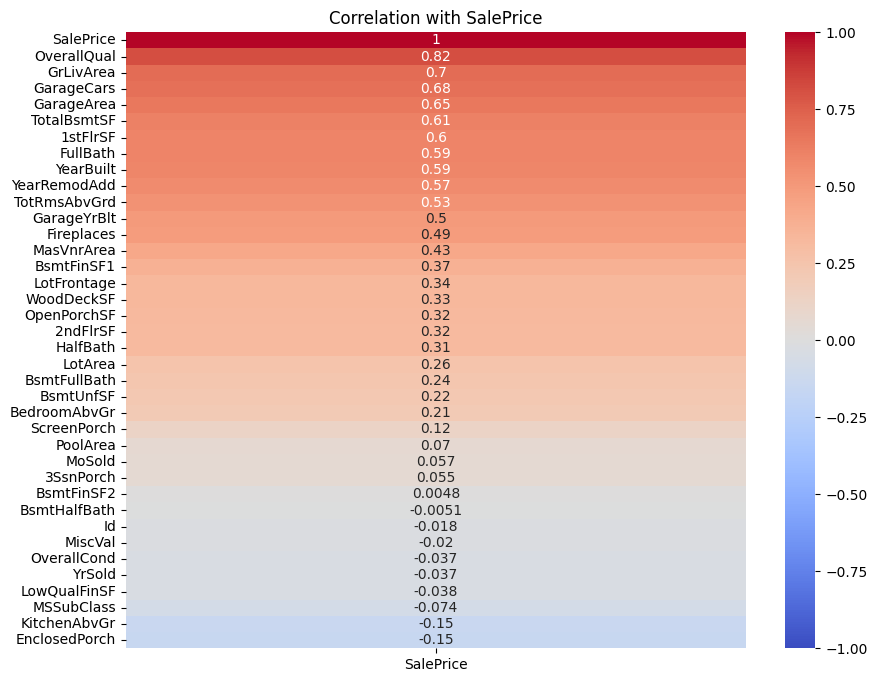

Columns with high correlation to SalePrice (sorted): ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath']


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
num_columns = df_train.select_dtypes(include=['number']).columns.tolist()

# Select the numerical columns data
gf = df_train[num_columns]

# Calculate the correlation matrix
corr = gf.corr()


    # Sort the correlation values with 'SalePrice' in descending order
sorted_corr = corr['SalePrice'].sort_values(ascending=False)

    # Plot the heatmap for correlation with 'SalePrice'
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with SalePrice')
plt.show()

    # Get the columns with correlation greater than 0.3
hg_corr = sorted_corr[sorted_corr > 0.3].index.tolist()

    # Remove 'SalePrice' from the list if it's present
hg_corr.remove('SalePrice') if 'SalePrice' in hg_corr else None

    # Display the list of columns with high correlation in descending order
print("Columns with high correlation to SalePrice (sorted):", hg_corr)


Keeping numerical columns with corr > 0.3 

In [28]:
# Identify categorical columns
cat_columns = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Combine the high-correlation numerical columns with all categorical columns
columns_to_keep =  ['Id'] + hg_corr + cat_columns + ['SalePrice'] 

Now ensuring train and test set has same columns (this allows the prediction to work more efficiently)

In [29]:
# Create a filtered dataframe with only the selected columns
df_train_filtered = df_train[columns_to_keep]
df_test = df_test[['Id'] + hg_corr + cat_columns]

Cheching the info of the train and test set

In [30]:
# Display the filtered dataframe to verify
print(df_train_filtered.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   OverallQual    1460 non-null   int64   
 2   GrLivArea      1460 non-null   int64   
 3   GarageCars     1460 non-null   int64   
 4   GarageArea     1460 non-null   int64   
 5   TotalBsmtSF    1460 non-null   int64   
 6   1stFlrSF       1460 non-null   int64   
 7   FullBath       1460 non-null   int64   
 8   YearBuilt      1460 non-null   int64   
 9   YearRemodAdd   1460 non-null   int64   
 10  TotRmsAbvGrd   1460 non-null   int64   
 11  GarageYrBlt    1460 non-null   float64 
 12  Fireplaces     1460 non-null   int64   
 13  MasVnrArea     1460 non-null   float64 
 14  BsmtFinSF1     1460 non-null   int64   
 15  LotFrontage    1460 non-null   float64 
 16  WoodDeckSF     1460 non-null   int64   
 17  OpenPorchSF    1460 non-null   in

# 3. Splitting the dataset

We will split the dataset.

*Note: We don't need to split that train set into the trditional 80/20 split because we will be using cross validation with 5-folds*

In [31]:
# Define features (X) and target variable (y)
X_train = df_train_filtered.drop(columns=['SalePrice'])  # Drop target variable from features
y_train = df_train_filtered['SalePrice']  # Target variable

X_test = df_test

In [32]:
import pandas as pd

def target_encode(train, test, y_train, categorical_cols):
    """
    Applies Target Encoding manually using Pandas.
    
    Parameters:
    train (DataFrame): Training feature set.
    test (DataFrame): Test set (only transformed, not fitted).
    y_train (Series): Target variable for training.
    categorical_cols (list): List of categorical column names.

    Returns:
    DataFrame, DataFrame: Encoded train and test data.
    """
    train_encoded = train.copy()
    test_encoded = test.copy()
    
    for col in categorical_cols:
        # Compute mean target value for each category
        target_means = train.groupby(col)[y_train.name].mean()

        # Map the means to the categorical column in training and test sets
        train_encoded[col] = train[col].map(target_means)
        test_encoded[col] = test[col].map(target_means)

        # If unseen categories appear in test, replace them with the overall mean
        overall_mean = y_train.mean()
        train_encoded[col].fillna(overall_mean, inplace=True)
        test_encoded[col].fillna(overall_mean, inplace=True)

    return train_encoded, test_encoded

# Define features (X) and target variable (y)
X_train = df_train_filtered.drop(columns=['SalePrice'])  # Drop target variable from features
y_train = df_train_filtered['SalePrice']  # Target variable
X_test = df_test  # Kaggle test set

# Identify categorical columns automatically (if not specified manually)
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Apply target encoding
X_train_encoded, X_test_encoded = target_encode(X_train, X_test, y_train, categorical_cols)

# Now, X_train_encoded is ready for cross-validation (cv=5)
print("✅ Target Encoding Completed!")
print(X_train_encoded.head())  # Show sample encoded data


✅ Target Encoding Completed!
   Id  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0   1            7       1710           2         548          856       856   
1   2            6       1262           2         460         1262      1262   
2   3            7       1786           2         608          920       920   
3   4            7       1717           3         642          756       961   
4   5            8       2198           3         836         1145      1145   

   FullBath  YearBuilt  YearRemodAdd  ...  KitchenQual  Functional  \
0         2       2003          2003  ...           Gd         Typ   
1         2       1976          1976  ...           TA         Typ   
2         2       2001          2002  ...           Gd         Typ   
3         1       1915          1970  ...           Gd         Typ   
4         2       2000          2000  ...           Gd         Typ   

   FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  Pav

# 4. Model training and optimazation

## 4.1 XGBoost and Optuna for hyperparamter tuning

In [33]:
!pip install optuna
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 9.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.5/599.5 kB 27.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 1.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [34]:
import optuna

import xgboost as xgb

# Patch the issue
def _sklearn_tags(self):
    return {"estimator_type": "regressor"}

xgb.XGBRegressor.__sklearn_tags__ = _sklearn_tags

from sklearn.model_selection import cross_val_score

# Define the objective function
def objective(trial):
    # Define hyperparameter search space
    params = {
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
    }
    
    # Initialize the model
    model = xgb.XGBRegressor(**params,enable_categorical=True, random_state=42)

    
    # Perform cross-validation
    score = cross_val_score(model, X_train_encoded, y_train, cv=5, n_jobs=-1)
    accuracy = score.mean()
    
    return accuracy  # Optuna tries to maximize, so return RMSE as negative

# Create study and optimize
study = optuna.create_study(direction="maximize")  # Maximize accuracy
study.optimize(objective, n_trials=20)

# Print best parameters
print("Best parameters:", study.best_params)


/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-17 14:25:39,663] A new study created in memory with name: no-name-1a1e7c07-e123-4e37-bdc3-2335aca63f9f
[I 2025-03-17 14:25:42,464] Trial 0 finished with value: 0.8681273382053071 and parameters: {'max_depth': 9, 'learning_rate': 0.08105242006518694, 'n_estimators': 250, 'subsample': 0.8448905948440095, 'colsample_bytree': 0.8094404788172016, 'reg_alpha': 2.214075990786176, 'reg_lambda': 2.4163510464004165}. Best is trial 0 with value: 0.8681273382053071.
[I 2025-03-17 14:25:43,515] Trial 1 finished with value: 0.8471514309679268 and parameters: {'max_depth': 8, 'learning_rate': 0.2698941560147317, 'n_estimators': 250, 'subsample': 0.8837593904840646, 'colsample_bytree': 0.602868317193749, 'reg_alpha': 4.634535567705172, 'reg_lambda': 

Best parameters: {'max_depth': 8, 'learning_rate': 0.04217795005687503, 'n_estimators': 500, 'subsample': 0.7995714757112238, 'colsample_bytree': 0.9073447949924767, 'reg_alpha': 0.0697814100582903, 'reg_lambda': 0.08246432332462827}


In [35]:

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.8860365361377045
Best hyperparameters: {'max_depth': 8, 'learning_rate': 0.04217795005687503, 'n_estimators': 500, 'subsample': 0.7995714757112238, 'colsample_bytree': 0.9073447949924767, 'reg_alpha': 0.0697814100582903, 'reg_lambda': 0.08246432332462827}


In [37]:
# Make predictions using the best model
best_params = study.best_params
best_model = xgb.XGBRegressor(**best_params, random_state=42,enable_categorical=True)
best_model.fit(X_train, y_train)


# Predict using the best model
predictions_log = best_model.predict(X_test)

# Apply inverse log transformation (exponential)
predictions = np.exp(predictions_log)

# Prepare submission file
submission = pd.DataFrame({"Id": df_test["Id"], "SalePrice": predictions})

submission.head()

# Save to CSV (without index)
submission.to_csv("submission.csv", index=False)

print("Submission file saved as submission.csv")


Submission file saved as submission.csv
